<a href="https://colab.research.google.com/github/Arteechess/Machine-learning-methods/blob/main/LAB_1_Fisrt_tasks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks_Machine_learning_methods')

# импорт модулей
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import sklearn

# загрузка датасета
from keras.datasets import mnist
(X_train, y_train), (X_test,  y_test) = mnist.load_data()

# создание своего разбиения датасета
from sklearn.model_selection import train_test_split

# объединяем в один набор
X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))

# разбиваем по вариантам
X_train, X_test,  y_train, y_test = train_test_split(X, y,
test_size = 10000,
train_size = 60000,
random_state = 123)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
# импорт модулей
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import sklearn

# загрузка датасета
from keras.datasets import mnist
(X_train, y_train), (X_test,  y_test) = mnist.load_data()

# создание своего разбиения датасета
from sklearn.model_selection import train_test_split

# объединяем в один набор
X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))

# разбиваем по вариантам
X_train, X_test,  y_train, y_test = train_test_split(X, y,
test_size = 10000,
train_size = 60000,
random_state = 123)

# развернем каждое изображение 28*28 в вектор 784
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0],   num_pixels)   / 255
X_test = X_test.reshape(X_test.shape[0],  num_pixels)   / 255
print('Shape of transformed X train:', X_train.shape)

# переведем метки в one-hot
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print('Shape of transformed y train:', y_train.shape)
num_classes = y_train.shape[1]

print('Shape of transformed X test:', X_test.shape)
print('Shape of transformed Y test:', y_test.shape)


Shape of transformed X train: (60000, 784)
Shape of transformed y train: (60000, 10)
Shape of transformed X test: (10000, 784)
Shape of transformed Y test: (10000, 10)


In [5]:
# импорт модулей
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import sklearn

# загрузка датасета
from keras.datasets import mnist
(X_train, y_train), (X_test,  y_test) = mnist.load_data()

# создание своего разбиения датасета
from sklearn.model_selection import train_test_split

# объединяем в один набор
X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))

# разбиваем по вариантам
X_train, X_test,  y_train, y_test = train_test_split(X, y,
test_size = 10000,
train_size = 60000,
random_state = 123)

# развернем каждое изображение 28*28 в вектор 784
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0],   num_pixels)   / 255
X_test = X_test.reshape(X_test.shape[0],  num_pixels)   / 255
print('Shape of transformed X train:', X_train.shape)

# переведем метки в one-hot
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print('Shape of transformed y train:', y_train.shape)
num_classes = y_train.shape[1]

print('Shape of transformed X test:', X_test.shape)
print('Shape of transformed Y test:', y_test.shape)

from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(units=num_classes, input_dim=num_pixels, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

#  1.  создаем модель  - объявляем ее объектом класса Sequential
model = Sequential()
# 2. добавляем первый скрытый слой
model.add(Dense(units=300, input_dim=num_pixels, activation='sigmoid'))
# 3. добавляем второй скрытый слой
model.add(Dense(units=10, activation='sigmoid'))
# 4. добавляем выходной слой
model.add(Dense(units=10, activation='softmax'))
# 5. компилируем модель
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

print(model.summary())

# Обучаем модель
H = model.fit(X_train, y_train, validation_split=0.1, epochs=20)

# вывод графика ошибки по эпохам
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss'])
plt.title('Loss by epochs')

plt.show()

Shape of transformed X train: (60000, 784)
Shape of transformed y train: (60000, 10)
Shape of transformed X test: (10000, 784)
Shape of transformed Y test: (10000, 10)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         3,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 238,620 (932.11 KB)

 Trainable params: 238,620 (932.11 KB)

 Non-trainable params: 0 (0.00 B)

None


Shape of transformed X train: (60000, 784)
Shape of transformed y train: (60000, 10)
Shape of transformed X test: (10000, 784)
Shape of transformed Y test: (10000, 10)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │         3,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 238,620 (932.11 KB)

 Trainable params: 238,620 (932.11 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.1878 - loss: 2.2930 - val_accuracy: 0.4127 - val_loss: 2.1498
Epoch 2/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.5138 - loss: 2.0626 - val_accuracy: 0.6328 - val_loss: 1.7385
Epoch 3/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6420 - loss: 1.6196 - val_accuracy: 0.7017 - val_loss: 1.3240
Epoch 4/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7253 - loss: 1.2454 - val_accuracy: 0.7535 - val_loss: 1.0777
Epoch 5/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7686 - loss: 1.0290 - val_accuracy: 0.7788 - val_loss: 0.9160
Epoch 6/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7979 - loss: 0.8791 - val_accuracy: 0.8062 - val_loss: 0.7972
Epoch 7/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8205 - loss: 0.7690 - val_accuracy: 0.8285 - val_loss: 0.7101
Epoch 8/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8386 - loss: 0.6

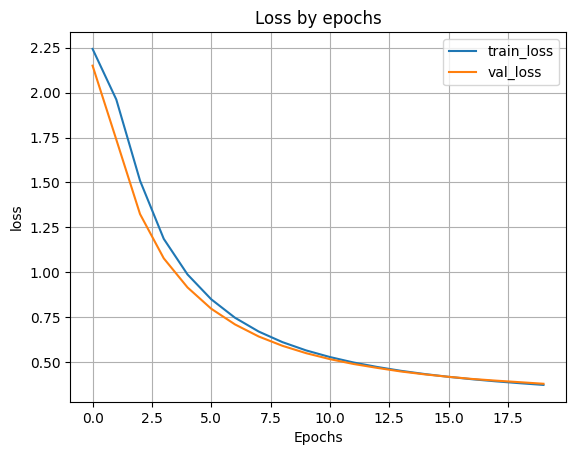

In [6]:
# импорт модулей
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import sklearn

# загрузка датасета
from keras.datasets import mnist
(X_train, y_train), (X_test,  y_test) = mnist.load_data()

# создание своего разбиения датасета
from sklearn.model_selection import train_test_split

# объединяем в один набор
X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))

# разбиваем по вариантам
X_train, X_test,  y_train, y_test = train_test_split(X, y,
test_size = 10000,
train_size = 60000,
random_state = 123)

# развернем каждое изображение 28*28 в вектор 784
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0],   num_pixels)   / 255
X_test = X_test.reshape(X_test.shape[0],  num_pixels)   / 255
print('Shape of transformed X train:', X_train.shape)

# переведем метки в one-hot
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print('Shape of transformed y train:', y_train.shape)
num_classes = y_train.shape[1]

print('Shape of transformed X test:', X_test.shape)
print('Shape of transformed Y test:', y_test.shape)

from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(units=num_classes, input_dim=num_pixels, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

#  1.  создаем модель  - объявляем ее объектом класса Sequential
model = Sequential()
# 2. добавляем первый скрытый слой
model.add(Dense(units=300, input_dim=num_pixels, activation='sigmoid'))
# 3. добавляем второй скрытый слой
model.add(Dense(units=10, activation='sigmoid'))
# 4. добавляем выходной слой
model.add(Dense(units=10, activation='softmax'))
# 5. компилируем модель
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

print(model.summary())

# Обучаем модель
H = model.fit(X_train, y_train, validation_split=0.1, epochs=20)

# вывод графика ошибки по эпохам
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss'])
plt.title('Loss by epochs')

plt.show()

Shape of transformed X train: (60000, 784)
Shape of transformed y train: (60000, 10)
Shape of transformed X test: (10000, 784)
Shape of transformed Y test: (10000, 10)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 10)             │         3,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 238,620 (932.11 KB)

 Trainable params: 238,620 (932.11 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.1526 - loss: 2.3037 - val_accuracy: 0.3105 - val_loss: 2.1797
Epoch 2/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.3786 - loss: 2.1082 - val_accuracy: 0.4703 - val_loss: 1.8365
Epoch 3/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.4972 - loss: 1.7389 - val_accuracy: 0.5675 - val_loss: 1.4966
Epoch 4/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6057 - loss: 1.4284 - val_accuracy: 0.6593 - val_loss: 1.2529
Epoch 5/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6986 - loss: 1.1979 - val_accuracy: 0.7408 - val_loss: 1.0513
Epoch 6/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7615 - loss: 1.0054 - val_accuracy: 0.7798 - val_loss: 0.8884
Epoch 7/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7953 - loss: 0.8579 - val_accuracy: 0.8095 - val_loss: 0.7702
Epoch 8/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8172 - loss: 0.

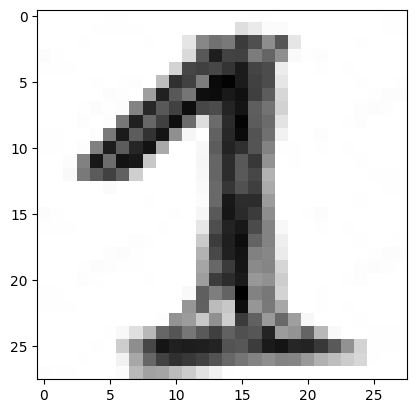

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Распознана цифра  0


In [10]:
# импорт модулей
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import sklearn

# загрузка датасета
from keras.datasets import mnist
(X_train, y_train), (X_test,  y_test) = mnist.load_data()

# создание своего разбиения датасета
from sklearn.model_selection import train_test_split

# объединяем в один набор
X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))

# разбиваем по вариантам
X_train, X_test,  y_train, y_test = train_test_split(X, y,
test_size = 10000,
train_size = 60000,
random_state = 123)

# развернем каждое изображение 28*28 в вектор 784
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0],   num_pixels)   / 255
X_test = X_test.reshape(X_test.shape[0],  num_pixels)   / 255
print('Shape of transformed X train:', X_train.shape)

# переведем метки в one-hot
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print('Shape of transformed y train:', y_train.shape)
num_classes = y_train.shape[1]

print('Shape of transformed X test:', X_test.shape)
print('Shape of transformed Y test:', y_test.shape)

from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(units=num_classes, input_dim=num_pixels, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

#  1.  создаем модель  - объявляем ее объектом класса Sequential
model = Sequential()
# 2. добавляем первый скрытый слой
model.add(Dense(units=300, input_dim=num_pixels, activation='sigmoid'))
# 3. добавляем второй скрытый слой
model.add(Dense(units=10, activation='sigmoid'))
# 4. добавляем выходной слой
model.add(Dense(units=10, activation='softmax'))
# 5. компилируем модель
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

print(model.summary())

# Обучаем модель
H = model.fit(X_train, y_train, validation_split=0.1, epochs=20)

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Загрузите новое изображение цифры 1
file_data = Image.open('test.png')  # замените на свое изображение
file_data = file_data.convert('L')  # перевод в градации серого
file_data = file_data.resize((28, 28))  # изменение размера изображения
test_img = np.array(file_data)

# Вывод собственного изображения
plt.imshow(test_img, cmap=plt.get_cmap('gray'))
plt.show()

# Предобработка
test_img = test_img / 255
test_img = test_img.reshape(1, num_pixels)  # num_pixels должно быть 784

# Распознавание
result = model.predict(test_img)
print('Распознана цифра ', np.argmax(result))


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8639 - loss: 0.4806 - val_accuracy: 0.9524 - val_loss: 0.1629
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9623 - loss: 0.1313 - val_accuracy: 0.9645 - val_loss: 0.1160
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9734 - loss: 0.0908 - val_accuracy: 0.9653 - val_loss: 0.1104
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 0.9817 - loss: 0.0651 - val_accuracy: 0.9728 - val_loss: 0.0938
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9870 - loss: 0.0459 - val_accuracy: 0.9734 - val_loss: 0.0889
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
NN output: [[7.1948930e-06 8.5848515e-05 1.1219294e-05 2.1980950e-06 1.1216133e-04
  5.4829696e-04 9.9922609e-01 1.6968811e-07 3.3659487e-06 3.4763871e-06]]


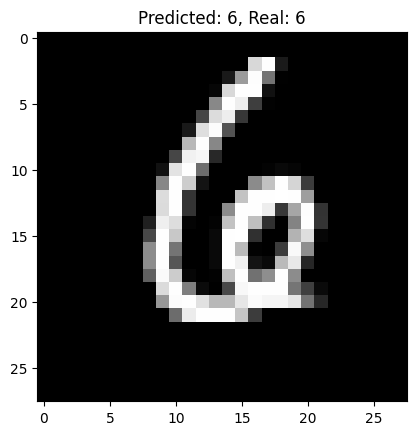

Real mark:   6
NN answer:   6


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

# 1. Загрузка и подготовка данных
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Нормализуем данные
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Преобразуем метки в категориальный формат
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# 2. Создание модели нейронной сети
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))  # Преобразуем 2D изображения в 1D векторы
model.add(Dense(128, activation='relu'))   # Скрытый слой с 128 нейронами и функцией активации ReLU
model.add(Dense(10, activation='softmax'))  # Выходной слой с 10 классами и функцией активации softmax

# 3. Компиляция модели
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 4. Обучение модели
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# 5. Проверка результатов для одного изображения
n = 123  # Индекс тестового изображения
result = model.predict(X_test[n:n+1])  # Предсказание для одного изображения

# Вывод результатов
print('NN output:', result)

# Отображение изображения
plt.imshow(X_test[n], cmap=plt.get_cmap('gray'))
plt.title(f"Predicted: {np.argmax(result)}, Real: {np.argmax(y_test[n])}")
plt.show()

print('Real mark:  ', str(np.argmax(y_test[n])))  # Реальный класс
print('NN answer:  ', str(np.argmax(result)))  # Предсказанный класс








